# Beijing Chaoyang district Airbnb data analysis

<h4>Background</h4>
<p>There are more than 11,000 Airbnb rooms listed in data set published by "public.opendatasoft.com". For potential investors who want to start a Airbnb business in Beijing, it would beneficial to conduct an analysis based on location, and see if there is any correlation between location features and Airbnb monetization. And for both investors and travelers, they will be benefited from a visualization color coded each Airbnb asset with its segmentation associated with its location features.</p>
<h4>Data Source</h4>
<p>I acquired Airbnb listing data from "public.opendatasoft.com"， which contains a list of Airbnb assets and its location, price, number of rent information. In addition, I used API provided by "Foursquare" to find common venues around Airbnb assets to portrait its location features.</p>

<h3>1. Processing Airbnb Data</h3>

In [66]:
# import basic libraries, and load Airbnb data into pd dataframe
import pandas as pd
import numpy as np
airbnb_data = pd.read_csv('./air-bnb-listings-Beijing.csv')
airbnb_data.head()

Room ID    Host ID Neighbourhood        Room type  Room Price  \
0  23863938  147652234      Chaoyang  Entire home/apt         398   
1  23914071   19772308      Chaoyang  Entire home/apt         418   
2  23915836  158663144      Chaoyang  Entire home/apt         397   
3  24186440   94142508      Chaoyang  Entire home/apt         518   
4  24274046   29488633      Chaoyang     Private room         171   

   Minimum nights  Number of reviews Date last review  \
0               1                  6        2/19/2019   
1               1                  1         4/1/2018   
2              20                 49        6/12/2019   
3               1                  0              NaN   
4               1                 15        8/30/2019   

   Number of reviews per month  Rooms rent by the host  Availibility  \
0                         0.35                       5           364   
1                         0.06                       1             0   
2                         2.74                       9             3   
3                          NaN                       7           365   
4                         0.85                      27           358   

  Updated Date     City Country                   Coordinates  
0    9/23/2019  Beijing   China   39.8952155567, 116.46591907  
1    9/23/2019  Beijing   China  39.9577003398, 116.443189661  
2    9/23/2019  Beijing   China    39.891989506, 116.44585669  
3    9/23/2019  Beijing   China  39.9265754348, 116.615418345  
4    9/23/2019  Beijing   China  39.9975167474, 116.464205076

<p>There are many fields which may not useful to our analysis, so we will drop them, but remaining: "Coordinates", to find location features through Foursquare API calls; "Room price", as indication ability of monetization; And "Room type" as we want to only use the most common room type for analysis, as room type itself is a independent variable which price may depend on.</p>

In [67]:
airbnb_data = airbnb_data[['Room type','Room Price','Coordinates']]
airbnb_data

Room type  Room Price                   Coordinates
0      Entire home/apt         398   39.8952155567, 116.46591907
1      Entire home/apt         418  39.9577003398, 116.443189661
2      Entire home/apt         397    39.891989506, 116.44585669
3      Entire home/apt         518  39.9265754348, 116.615418345
4         Private room         171  39.9975167474, 116.464205076
...                ...         ...                           ...
11825     Private room         697  39.9859502087, 116.435503117
11826  Entire home/apt         525  39.9001321372, 116.470426807
11827  Entire home/apt         647  39.9324756528, 116.467495116
11828     Private room         199  39.8875319023, 116.466949285
11829  Entire home/apt         801   39.9133870212, 116.47546383

[11830 rows x 3 columns]

Let's look at the two main dimensions:

In [68]:
airbnb_data.groupby(by='Room type').count()

Room Price  Coordinates
Room type                               
Entire home/apt        6876         6876
Private room           4069         4069
Shared room             885          885

In [69]:
# as most frequent room type is Entire home/apt, we will drop the other two types
airbnb_data.drop( airbnb_data[ airbnb_data['Room type'] == 'Private room' ].index , inplace=True)
airbnb_data.drop( airbnb_data[ airbnb_data['Room type'] == 'Shared room' ].index , inplace=True)

In [70]:
# as now all data is Entire home/apt, we don't need Room type column
airbnb_data.drop(['Room type'], axis = 1, inplace = True)
airbnb_data.head()

Room Price                   Coordinates
0         398   39.8952155567, 116.46591907
1         418  39.9577003398, 116.443189661
2         397    39.891989506, 116.44585669
3         518  39.9265754348, 116.615418345
6         455   39.9331540173, 116.45231878

Next we want to visualize the rooms on the map to have a first impression

In [71]:
airbnb_data['Latitude'], airbnb_data['Longitude'] = airbnb_data['Coordinates'].str.split(',', 1).str
airbnb_data

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


Room Price                   Coordinates       Latitude       Longitude
0             398   39.8952155567, 116.46591907  39.8952155567    116.46591907
1             418  39.9577003398, 116.443189661  39.9577003398   116.443189661
2             397    39.891989506, 116.44585669   39.891989506    116.44585669
3             518  39.9265754348, 116.615418345  39.9265754348   116.615418345
6             455   39.9331540173, 116.45231878  39.9331540173    116.45231878
...           ...                           ...            ...             ...
11820         391  39.9394216027, 116.447158718  39.9394216027   116.447158718
11823         292   39.915874248, 116.499888534   39.915874248   116.499888534
11826         525  39.9001321372, 116.470426807  39.9001321372   116.470426807
11827         647  39.9324756528, 116.467495116  39.9324756528   116.467495116
11829         801   39.9133870212, 116.47546383  39.9133870212    116.47546383

[6876 rows x 4 columns]

In [72]:
airbnb_data.drop(['Coordinates'], axis = 1, inplace = True)
airbnb_data.head()

Room Price       Latitude       Longitude
0         398  39.8952155567    116.46591907
1         418  39.9577003398   116.443189661
2         397   39.891989506    116.44585669
3         518  39.9265754348   116.615418345
6         455  39.9331540173    116.45231878

In [73]:
airbnb_data['Latitude'] = airbnb_data['Latitude'].astype(float)
airbnb_data['Longitude'] = airbnb_data['Longitude'].astype(float)
airbnb_data.dtypes

Room Price      int64
Latitude      float64
Longitude     float64
dtype: object

In [74]:
airbnb_data.describe()

Room Price     Latitude    Longitude
count   6876.000000  6876.000000  6876.000000
mean     678.210151    39.931395   116.475742
std     2247.202016     0.042466     0.046627
min        0.000000    39.820607   116.347193
25%      391.000000    39.899278   116.448196
50%      491.000000    39.922715   116.466536
75%      631.000000    39.959297   116.494151
max    71110.000000    40.099771   116.621531

In [75]:
airbnb_data.dropna()
airbnb_data.describe()

Room Price     Latitude    Longitude
count   6876.000000  6876.000000  6876.000000
mean     678.210151    39.931395   116.475742
std     2247.202016     0.042466     0.046627
min        0.000000    39.820607   116.347193
25%      391.000000    39.899278   116.448196
50%      491.000000    39.922715   116.466536
75%      631.000000    39.959297   116.494151
max    71110.000000    40.099771   116.621531

In [76]:
# !conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [77]:
latitude = 39.922478
longitude = 116.443710

In [78]:
# create map and display it
mymap = folium.Map(location=[latitude, longitude], zoom_start=12)

mymap

In [79]:
# instantiate a feature group for the incidents in the dataframe
rooms = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(airbnb_data.Latitude, airbnb_data.Longitude):
    rooms.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
mymap.add_child(rooms)

As there are too many rooms, we probably want to group the rooms into neighborhoods first, purely based on their coordinations.

In [80]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [81]:
X = airbnb_data[['Latitude','Longitude']].values
X

array([[ 39.89521556, 116.46591907],
       [ 39.95770034, 116.44318966],
       [ 39.89198951, 116.44585669],
       ...,
       [ 39.90013214, 116.47042681],
       [ 39.93247565, 116.46749512],
       [ 39.91338702, 116.47546383]])

In [82]:
epsilon = 0.003
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 0, 0])

In [83]:
frames = [airbnb_data, pd.DataFrame(labels)]
data_all = pd.concat(frames, axis = 1)
data_all

Room Price   Latitude   Longitude    0
0           398.0  39.895216  116.465919  0.0
1           418.0  39.957700  116.443190  1.0
2           397.0  39.891990  116.445857  0.0
3           518.0  39.926575  116.615418  2.0
4             NaN        NaN         NaN  0.0
...           ...        ...         ...  ...
11820       391.0  39.939422  116.447159  NaN
11823       292.0  39.915874  116.499889  NaN
11826       525.0  39.900132  116.470427  NaN
11827       647.0  39.932476  116.467495  NaN
11829       801.0  39.913387  116.475464  NaN

[9759 rows x 4 columns]

In [84]:
data_all = data_all.dropna()
data_all

Room Price   Latitude   Longitude    0
0          398.0  39.895216  116.465919  0.0
1          418.0  39.957700  116.443190  1.0
2          397.0  39.891990  116.445857  0.0
3          518.0  39.926575  116.615418  2.0
6          455.0  39.933154  116.452319  0.0
...          ...        ...         ...  ...
6871       461.0  40.001994  116.406207  0.0
6872      1340.0  39.959243  116.464479  0.0
6873       427.0  39.989369  116.475124  0.0
6874       652.0  39.958249  116.466196  0.0
6875       597.0  39.908001  116.498314  0.0

[3993 rows x 4 columns]

In [85]:
data_all.columns

Index(['Room Price', 'Latitude', 'Longitude', 0], dtype='object')

In [86]:
data = data_all.groupby([0]).mean()
data

Room Price   Latitude   Longitude
0                                        
-1.0    764.677019  39.931676  116.478618
 0.0    688.134978  39.931880  116.476359
 1.0    629.724138  39.934953  116.472465
 2.0    574.338028  39.925770  116.466964
 3.0    579.641026  39.931673  116.479403
 4.0    584.870370  39.930604  116.477823
 5.0    589.500000  39.932837  116.467235
 6.0    829.217391  39.931264  116.471659
 7.0    638.112360  39.933267  116.473743
 8.0    687.900000  39.903504  116.473258
 9.0   1026.852713  39.931487  116.476211
 10.0   643.952830  39.933229  116.471730
 11.0  1390.250000  39.899693  116.526013
 12.0   560.619048  39.941850  116.460735
 13.0   512.608696  39.936971  116.475699
 14.0   583.613636  39.926983  116.479327
 15.0   651.975000  39.918977  116.492646
 16.0   569.375000  39.945509  116.472930
 17.0  1218.911111  39.929052  116.478631
 18.0   493.200000  39.930461  116.467434
 19.0   481.875000  39.933942  116.472431
 20.0   528.300000  39.939178  116.468105
 21.0   511.222222  39.920243  116.472158
 22.0   481.000000  39.926609  116.475856
 23.0   516.538462  39.914285  116.483535
 24.0   611.166667  39.904351  116.487356
 25.0   514.750000  39.936811  116.476208
 26.0   632.000000  39.921874  116.473892
 27.0   463.166667  39.920046  116.486993
 28.0   495.777778  39.962028  116.470660
 29.0  1145.333333  39.934198  116.464107
 30.0   781.250000  39.943900  116.447120
 31.0   670.142857  39.912957  116.482282
 32.0   690.000000  39.964928  116.455305
 33.0   398.250000  39.953129  116.469291
 34.0   462.200000  39.934563  116.504243
 35.0   480.800000  39.930732  116.451137
 36.0   573.625000  39.939988  116.455584
 37.0   624.833333  39.941205  116.474106
 38.0   499.400000  39.958658  116.455985
 39.0   405.000000  39.914433  116.455897
 40.0   409.000000  39.907356  116.472702

In [87]:
data.reset_index(inplace=True)
data.rename(columns={0:'Neighborhood','Room Price':'Price'}, inplace=True)
data

Neighborhood        Price   Latitude   Longitude
0           -1.0   764.677019  39.931676  116.478618
1            0.0   688.134978  39.931880  116.476359
2            1.0   629.724138  39.934953  116.472465
3            2.0   574.338028  39.925770  116.466964
4            3.0   579.641026  39.931673  116.479403
5            4.0   584.870370  39.930604  116.477823
6            5.0   589.500000  39.932837  116.467235
7            6.0   829.217391  39.931264  116.471659
8            7.0   638.112360  39.933267  116.473743
9            8.0   687.900000  39.903504  116.473258
10           9.0  1026.852713  39.931487  116.476211
11          10.0   643.952830  39.933229  116.471730
12          11.0  1390.250000  39.899693  116.526013
13          12.0   560.619048  39.941850  116.460735
14          13.0   512.608696  39.936971  116.475699
15          14.0   583.613636  39.926983  116.479327
16          15.0   651.975000  39.918977  116.492646
17          16.0   569.375000  39.945509  116.472930
18          17.0  1218.911111  39.929052  116.478631
19          18.0   493.200000  39.930461  116.467434
20          19.0   481.875000  39.933942  116.472431
21          20.0   528.300000  39.939178  116.468105
22          21.0   511.222222  39.920243  116.472158
23          22.0   481.000000  39.926609  116.475856
24          23.0   516.538462  39.914285  116.483535
25          24.0   611.166667  39.904351  116.487356
26          25.0   514.750000  39.936811  116.476208
27          26.0   632.000000  39.921874  116.473892
28          27.0   463.166667  39.920046  116.486993
29          28.0   495.777778  39.962028  116.470660
30          29.0  1145.333333  39.934198  116.464107
31          30.0   781.250000  39.943900  116.447120
32          31.0   670.142857  39.912957  116.482282
33          32.0   690.000000  39.964928  116.455305
34          33.0   398.250000  39.953129  116.469291
35          34.0   462.200000  39.934563  116.504243
36          35.0   480.800000  39.930732  116.451137
37          36.0   573.625000  39.939988  116.455584
38          37.0   624.833333  39.941205  116.474106
39          38.0   499.400000  39.958658  116.455985
40          39.0   405.000000  39.914433  116.455897
41          40.0   409.000000  39.907356  116.472702

In [88]:
data.dtypes

Neighborhood    float64
Price           float64
Latitude        float64
Longitude       float64
dtype: object

In [89]:
# create map and display it
newmap = folium.Map(location=[latitude, longitude], zoom_start=12)

newmap

In [90]:
# instantiate a feature group for the incidents in the dataframe
neighborhoods = folium.map.FeatureGroup()

for lat, lng, price in zip(data.Latitude, data.Longitude, data.Price):
    neighborhoods.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=20-6000/price, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )

# add incidents to map
newmap.add_child(neighborhoods)

Now we have 40 neighborhoods. We showed them on a map with bubble size represent each neighborhood's average price. Next is to acquire features in each location, and cluster neighborhoods into segments to see if the segmentation is correlated to average price.

<h3>2. Acquire Location Features and Clustering</h3>

In [99]:
address = 'Chaoyang, Beijing'
# as geocoder service timeout, use average location
latitude = data['Latitude'].mean()
longitude = data['Longitude'].mean()
print('The geograpical coordinate of Chaoyang are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chaoyang are 39.93088216669465, 116.47366272598927.


In [103]:


CLIENT_ID = 'PZDSFOOWIYWU2B3UDLAA3V1WGJ04IO0BHBEIKRKWFPCLVF0H' # your Foursquare ID
CLIENT_SECRET = '0RJN32X0CNJQOZVCB5L1HMZYGOCIBTQCADEIYEJ2DD3EVIHL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PZDSFOOWIYWU2B3UDLAA3V1WGJ04IO0BHBEIKRKWFPCLVF0H
CLIENT_SECRET:0RJN32X0CNJQOZVCB5L1HMZYGOCIBTQCADEIYEJ2DD3EVIHL


In [112]:
import requests

In [113]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [114]:
nn = getNearbyVenues(names=data['Neighborhood'], latitudes=data['Latitude'], longitudes=data['Longitude'], radius=500)
nn.head()

-1.0
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          -1.0              39.931676              116.478618   
1          -1.0              39.931676              116.478618   
2          -1.0              39.931676              116.478618   
3          -1.0              39.931676              116.478618   
4          -1.0              39.931676              116.478618   

                             Venue  Venue Latitude  Venue Longitude  \
0               Jamaica Blue 蓝色牙买加       39.930164       116.478664   
1              April Gourmet (绿叶子)       39.931975       116.477151   
2             The Rug Bagel & Cafe       39.931934       116.477064   
3                             Napa       39.930106       116.479669   
4  Chaoyang Park South Gate 朝阳公园南门       39.932474       116.476096   

            Venue Category  
0              Coffee Shop  
1            Grocery Store  
2               Bagel Shop  
3  New American Restaurant  
4                     Park

In [115]:
# one hot encoding
onehot = pd.get_dummies(nn[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = nn['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot

Neighborhood  African Restaurant  Antique Shop  Arepa Restaurant  \
0            -1.0                   0             0                 0   
1            -1.0                   0             0                 0   
2            -1.0                   0             0                 0   
3            -1.0                   0             0                 0   
4            -1.0                   0             0                 0   
..            ...                 ...           ...               ...   
590          40.0                   0             0                 0   
591          40.0                   0             0                 0   
592          40.0                   0             0                 0   
593          40.0                   0             0                 0   
594          40.0                   0             0                 0   

     Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bar  \
0                   0                   0          0           0       0    0   
1                   0                   0          0           0       0    0   
2                   0                   0          0           1       0    0   
3                   0                   0          0           0       0    0   
4                   0                   0          0           0       0    0   
..                ...                 ...        ...         ...     ...  ...   
590                 0                   0          0           0       0    0   
591                 0                   0          0           0       0    0   
592                 0                   0          0           0       0    0   
593                 0                   0          0           0       0    0   
594                 0                   0          0           0       1    0   

     ...  Supermarket  Sushi Restaurant  Szechuan Restaurant  \
0    ...            0                 0                    0   
1    ...            0                 0                    0   
2    ...            0                 0                    0   
3    ...            0                 0                    0   
4    ...            0                 0                    0   
..   ...          ...               ...                  ...   
590  ...            0                 0                    0   
591  ...            0                 0                    0   
592  ...            0                 0                    0   
593  ...            0                 0                    0   
594  ...            0                 0                    0   

     Taiwanese Restaurant  Tennis Court  Thai Restaurant  \
0                       0             0                0   
1                       0             0                0   
2                       0             0                0   
3                       0             0                0   
4                       0             0                0   
..                    ...           ...              ...   
590                     0             0                0   
591                     0             0                0   
592                     0             0                0   
593                     0             0                0   
594                     0             0                0   

     Vietnamese Restaurant  Xinjiang Restaurant  Yoga Studio  \
0                        0                    0            0   
1                        0                    0            0   
2                        0                    0            0   
3                        0                    0            0   
4                        0                    0            0   
..                     ...                  ...          ...   
590                      0                    0            0   
591                      0                    0            0   
592                      0                    0            0   
593                      

In [116]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

Neighborhood  African Restaurant  Antique Shop  Arepa Restaurant  \
0           -1.0            0.000000           0.0          0.000000   
1            0.0            0.000000           0.0          0.000000   
2            1.0            0.000000           0.0          0.000000   
3            2.0            0.000000           0.0          0.000000   
4            3.0            0.000000           0.0          0.000000   
5            4.0            0.000000           0.0          0.000000   
6            5.0            0.000000           0.0          0.000000   
7            6.0            0.000000           0.0          0.000000   
8            7.0            0.000000           0.0          0.000000   
9            8.0            0.000000           0.0          0.000000   
10           9.0            0.000000           0.0          0.000000   
11          10.0            0.000000           0.0          0.000000   
12          11.0            0.000000           1.0          0.000000   
13          12.0            0.000000           0.0          0.000000   
14          13.0            0.000000           0.0          0.000000   
15          14.0            0.000000           0.0          0.000000   
16          15.0            0.000000           0.0          0.000000   
17          16.0            0.000000           0.0          0.000000   
18          17.0            0.000000           0.0          0.000000   
19          18.0            0.000000           0.0          0.000000   
20          19.0            0.000000           0.0          0.000000   
21          20.0            0.000000           0.0          0.000000   
22          21.0            0.000000           0.0          0.000000   
23          22.0            0.000000           0.0          0.000000   
24          23.0            0.000000           0.0          0.000000   
25          24.0            0.000000           0.0          0.000000   
26          25.0            0.000000           0.0          0.000000   
27          26.0            0.000000           0.0          0.000000   
28          27.0            0.000000           0.0          0.000000   
29          28.0            0.000000           0.0          0.000000   
30          29.0            0.000000           0.0          0.000000   
31          30.0            0.000000           0.0          0.032258   
32          31.0            0.000000           0.0          0.000000   
33          32.0            0.000000           0.0          0.000000   
34          33.0            0.000000           0.0          0.000000   
35          34.0            0.000000           0.0          0.000000   
36          35.0            0.026316           0.0          0.000000   
37          36.0            0.000000           0.0          0.000000   
38          37.0            0.000000           0.0          0.000000   
39          38.0            0.000000           0.0          0.000000   
40          39.0            0.000000           0.0          0.000000   
41          40.0            0.000000           0.0          0.000000   

    Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop    Bakery  \
0           0.000000            0.000000   0.000000    0.071429  0.000000   
1           0.058824            0.000000   0.000000    0.058824  0.000000   
2           0.000000            0.000000   0.000000    0.000000  0.100000   
3           0.222222            0.000000   0.000000    0.000000  0.000000   
4           0.000000            0.000000   0.000000    0.083333  0.000000   
5           0.047619            0.000000   0.000000    0.047619  0.000000   
6           0.000000            0.000000   0.000000    0.000000  0.076923   
7           0.000000            0.000000   0.000000    0.100000  0.000000   
8           0.000000            0.000000   0.000000    0.125000  0.000000   
9           0.000000            0.000000   0.000000    0.000000  0.000000   
10          0.058824            0.000000   0.000000    0.058

In [117]:
grouped['Neighborhood'] = grouped['Neighborhood'].astype(str)

In [118]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----1.0----
                     venue  freq
0              Coffee Shop  0.14
1               Restaurant  0.07
2  New American Restaurant  0.07
3               Playground  0.07
4     Fast Food Restaurant  0.07


----0.0----
                  venue  freq
0           Coffee Shop  0.12
1    Chinese Restaurant  0.12
2        Sandwich Place  0.06
3             Bookstore  0.06
4  Fast Food Restaurant  0.06


----1.0----
                venue  freq
0  Italian Restaurant   0.2
1                 Bar   0.1
2          Hot Spring   0.1
3       Grocery Store   0.1
4                Park   0.1


----2.0----
              venue  freq
0  Asian Restaurant  0.22
1              Café  0.22
2           Stadium  0.11
3    Farmers Market  0.11
4       Pizza Place  0.11


----3.0----
                     venue  freq
0              Coffee Shop  0.17
1               Restaurant  0.08
2  New American Restaurant  0.08
3               Playground  0.08
4     Fast Food Restaurant  0.08


----4.0----
                 

In [119]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [120]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0         -1.0           Coffee Shop                  Park   
1          0.0    Chinese Restaurant           Coffee Shop   
2          1.0    Italian Restaurant                  Park   
3          2.0      Asian Restaurant                  Café   
4          3.0           Coffee Shop            Playground   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Hotel  Gym / Fitness Center            Playground   
1     Italian Restaurant        Sandwich Place  Fast Food Restaurant   
2  Vietnamese Restaurant            Hot Spring    Chinese Restaurant   
3            Coffee Shop    Chinese Restaurant        Farmers Market   
4                   Park  Gym / Fitness Center         Grocery Store   

     6th Most Common Venue    7th Most Common Venue 8th Most Common Venue  \
0            Grocery Store  New American Restaurant            Bagel Shop   
1               Restaurant                Bookstore                  Park   
2            Grocery Store           Sandwich Place                Bakery   
3                  Stadium              Pizza Place     Yunnan Restaurant   
4  New American Restaurant               Bagel Shop            Restaurant   

  9th Most Common Venue   10th Most Common Venue  
0    Chinese Restaurant            Shopping Mall  
1            Bagel Shop  New American Restaurant  
2                   Bar        Electronics Store  
3           Flower Shop             Dessert Shop  
4                Garden       Chinese Restaurant

In [121]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 0], dtype=int32)

In [122]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [123]:
data['Neighborhood'] = data['Neighborhood'].astype(str)

merged = data

merged = pd.merge(merged,
                      neighborhoods_venues_sorted,
                      left_on='Neighborhood',
                      right_on='Neighborhood',
                      how='left'
                     )

merged.head() # check the last columns!

Neighborhood       Price   Latitude   Longitude  Cluster Labels  \
0         -1.0  764.677019  39.931676  116.478618               2   
1          0.0  688.134978  39.931880  116.476359               2   
2          1.0  629.724138  39.934953  116.472465               2   
3          2.0  574.338028  39.925770  116.466964               0   
4          3.0  579.641026  39.931673  116.479403               2   

  1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0           Coffee Shop                  Park                  Hotel   
1    Chinese Restaurant           Coffee Shop     Italian Restaurant   
2    Italian Restaurant                  Park  Vietnamese Restaurant   
3      Asian Restaurant                  Café            Coffee Shop   
4           Coffee Shop            Playground                   Park   

  4th Most Common Venue 5th Most Common Venue    6th Most Common Venue  \
0  Gym / Fitness Center            Playground            Grocery Store   
1        Sandwich Place  Fast Food Restaurant               Restaurant   
2            Hot Spring    Chinese Restaurant            Grocery Store   
3    Chinese Restaurant        Farmers Market                  Stadium   
4  Gym / Fitness Center         Grocery Store  New American Restaurant   

     7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0  New American Restaurant            Bagel Shop    Chinese Restaurant   
1                Bookstore                  Park            Bagel Shop   
2           Sandwich Place                Bakery                   Bar   
3              Pizza Place     Yunnan Restaurant           Flower Shop   
4               Bagel Shop            Restaurant                Garden   

    10th Most Common Venue  
0            Shopping Mall  
1  New American Restaurant  
2        Electronics Store  
3             Dessert Shop  
4       Chinese Restaurant

Now we have cluster tagged into each neighborhood, we want to examine each cluster to see what are the characteristics for each cluster and see if there is any differenciation in price between clusters.

<AxesSubplot:>

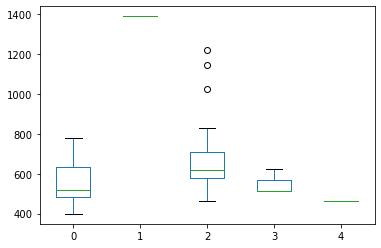

In [124]:
merged.assign(index=merged.groupby('Cluster Labels').cumcount()).pivot('index','Cluster Labels','Price').plot(kind='box')

In [125]:
merged.dtypes

Neighborhood               object
Price                     float64
Latitude                  float64
Longitude                 float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [126]:
cluster0 = merged.drop( merged[ merged['Cluster Labels'] != 0 ].index)
cluster0.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Asian Restaurant       4
Café                   1
Chinese Restaurant     1
Coffee Shop            5
Japanese Restaurant    4
Pizza Place            2
Name: Neighborhood, dtype: int64

In [127]:
cluster1 = merged.drop( merged[ merged['Cluster Labels'] != 1 ].index)
cluster1.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Antique Shop    1
Name: Neighborhood, dtype: int64

In [128]:
cluster2 = merged.drop( merged[ merged['Cluster Labels'] != 2 ].index)
cluster2.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Chinese Restaurant     8
Coffee Shop            5
Grocery Store          1
Hot Spring             1
Hotpot Restaurant      1
Italian Restaurant     2
Japanese Restaurant    1
Metro Station          1
Name: Neighborhood, dtype: int64

In [129]:
cluster3 = merged.drop( merged[ merged['Cluster Labels'] != 3 ].index)
cluster3.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Park            2
Tennis Court    1
Name: Neighborhood, dtype: int64

In [130]:
cluster4 = merged.drop( merged[ merged['Cluster Labels'] != 4 ].index)
cluster4.groupby(by='1st Most Common Venue').count()['Neighborhood']

1st Most Common Venue
Chinese Restaurant    1
Name: Neighborhood, dtype: int64

### Based on above analysis, we can conclude: 
Cluster 0 is more of a "Coffee shop area", Cluster 1 is more of a "Foreign Resteruant area", Cluster 2 is more of a "Antique shop area", Cluster 3 is "Park area", Cluster 4 is "Modern Lifestyle area"; And we see "Antique shop area" and "Modern Lifestyle area" perform better in terms of Airbnb price.

<h3>3. Visualization</h3>

In [131]:
cluster_names = merged['Cluster Labels'].map({0: 'Coffee shop area', 1:'Foreign Resteruant area', 2:'Antique shop area', 3:'Park area', 4:'Modern Lifestyle area'})
cluster_names = pd.DataFrame(cluster_names)
cluster_names.rename(columns={'Cluster Labels':'Cluster Names'}, inplace=True)
cluster_names.head()

Cluster Names
0  Antique shop area
1  Antique shop area
2  Antique shop area
3   Coffee shop area
4  Antique shop area

In [132]:
frame2 = [merged, cluster_names]
final_data = pd.concat(frame2, axis = 1)
final_data

Neighborhood        Price   Latitude   Longitude  Cluster Labels  \
0          -1.0   764.677019  39.931676  116.478618               2   
1           0.0   688.134978  39.931880  116.476359               2   
2           1.0   629.724138  39.934953  116.472465               2   
3           2.0   574.338028  39.925770  116.466964               0   
4           3.0   579.641026  39.931673  116.479403               2   
5           4.0   584.870370  39.930604  116.477823               2   
6           5.0   589.500000  39.932837  116.467235               2   
7           6.0   829.217391  39.931264  116.471659               2   
8           7.0   638.112360  39.933267  116.473743               2   
9           8.0   687.900000  39.903504  116.473258               0   
10          9.0  1026.852713  39.931487  116.476211               2   
11         10.0   643.952830  39.933229  116.471730               2   
12         11.0  1390.250000  39.899693  116.526013               1   
13         12.0   560.619048  39.941850  116.460735               0   
14         13.0   512.608696  39.936971  116.475699               3   
15         14.0   583.613636  39.926983  116.479327               2   
16         15.0   651.975000  39.918977  116.492646               0   
17         16.0   569.375000  39.945509  116.472930               0   
18         17.0  1218.911111  39.929052  116.478631               2   
19         18.0   493.200000  39.930461  116.467434               2   
20         19.0   481.875000  39.933942  116.472431               2   
21         20.0   528.300000  39.939178  116.468105               2   
22         21.0   511.222222  39.920243  116.472158               0   
23         22.0   481.000000  39.926609  116.475856               0   
24         23.0   516.538462  39.914285  116.483535               0   
25         24.0   611.166667  39.904351  116.487356               2   
26         25.0   514.750000  39.936811  116.476208               3   
27         26.0   632.000000  39.921874  116.473892               0   
28         27.0   463.166667  39.920046  116.486993               4   
29         28.0   495.777778  39.962028  116.470660               0   
30         29.0  1145.333333  39.934198  116.464107               2   
31         30.0   781.250000  39.943900  116.447120               0   
32         31.0   670.142857  39.912957  116.482282               0   
33         32.0   690.000000  39.964928  116.455305               2   
34         33.0   398.250000  39.953129  116.469291               0   
35         34.0   462.200000  39.934563  116.504243               2   
36         35.0   480.800000  39.930732  116.451137               0   
37         36.0   573.625000  39.939988  116.455584               2   
38         37.0   624.833333  39.941205  116.474106               3   
39         38.0   499.400000  39.958658  116.455985               0   
40         39.0   405.000000  39.914433  116.455897               0   
41         40.0   409.000000  39.907356  116.472702               0   

   1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
0            Coffee Shop                  Park                  Hotel   
1     Chinese Restaurant           Coffee Shop     Italian Restaurant   
2     Italian Restaurant                  Park  Vietnamese Restaurant   
3       Asian Restaurant                  Café            Coffee Shop   
4            Coffee Shop            Playground                   Park   
5     Chinese Restaurant           Coffee Shop             Playground   
6     Chinese Restaurant    Italian Restaurant          Deli / Bodega   
7     Chinese Restaurant             Bookstore                   Park   
8             Hot Spring                  Park            Coffee Shop   
9            Coffee Shop    Italian Restaurant    Japanese Restaurant   
10    Chinese Restaurant           Coffee Shop     Italian Restaurant   
11    Chinese Restaurant         Grocery Store     Italian Restaurant   


In [133]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(5)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, price in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels'], merged['Price']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20-6000/price,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# This is the end of this project, thanks for reading!